### Titanic Death Rate Prediction


In [78]:
import pandas as pd
import matplotlib.pyplot as plt


In [57]:
titanic = pd.read_csv("./titanic/train.csv")

In [58]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
features = ["Pclass", "Sex", "SibSp", "Parch"]

train_set = titanic

In [95]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [97]:
train_set.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [102]:
corr_matrix = train_set.drop(train_set.select_dtypes(include=["object", "string"]).columns , axis=1).corr()

In [103]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

#### Explore the data to gain insight

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

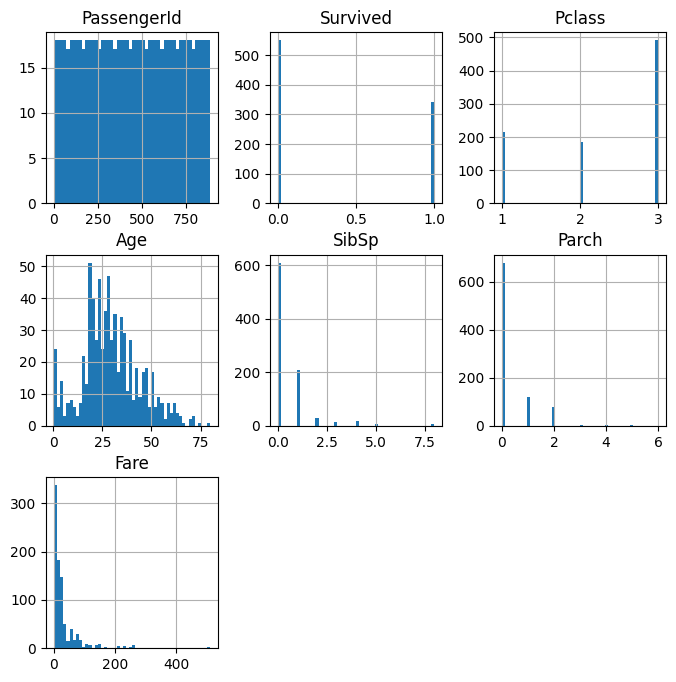

In [72]:
train_set.hist(bins=50, figsize=(8, 8))

Search for correlation

I want to know the age of people survived

In [76]:
survivors = train_set[train_set["Survived"] == 1]
non_survivors = train_set[train_set["Survived"] == 0] 

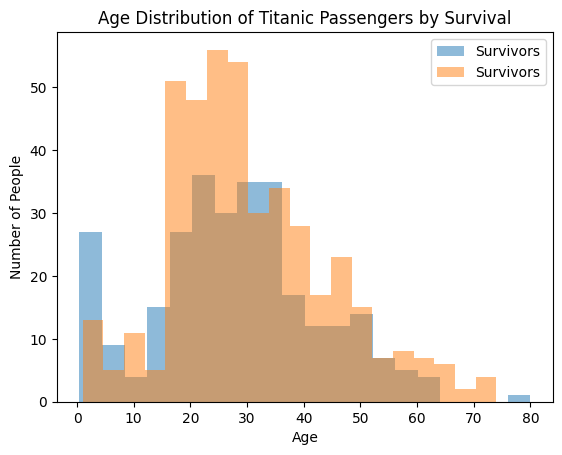

In [83]:
plt.hist(survivors['Age'], bins=20, alpha=0.5, label="Survivors")
plt.hist(non_survivors['Age'], bins=20, alpha=0.5, label="Survivors")

plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age Distribution of Titanic Passengers by Survival')
plt.legend()
plt.show()

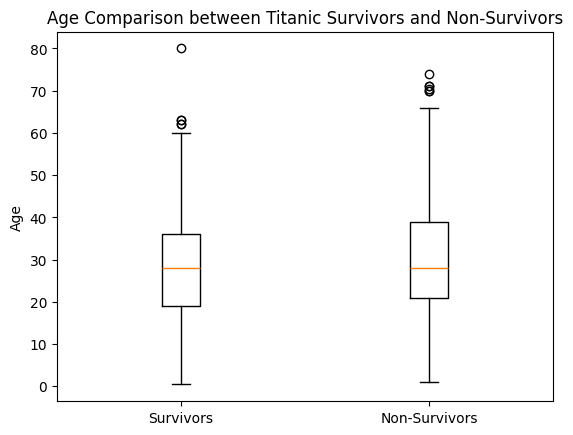

In [84]:
# Creating a box plot
plt.boxplot([survivors['Age'].dropna(), non_survivors['Age'].dropna()], labels=['Survivors', 'Non-Survivors'])

plt.ylabel('Age')
plt.title('Age Comparison between Titanic Survivors and Non-Survivors')
plt.show()


I don't have to live my life like anyone I can live my all life, experience it in my own ways 

In [62]:
gender_set = pd.read_csv("./titanic/gender_submission.csv")

In [87]:
woman = train_set.loc[train_set.Sex == 'female']['Survived']
rate_women = sum(woman) / len(woman)

print("% of women who survived: ", rate_women)

% of women who survived:  0.7420382165605095


In [86]:
men = train_set.loc[train_set.Sex == 'male']['Survived']
rate_men = sum(men) / len(men)

print("% of men who survived: ", rate_men)

% of men who survived:  0.18890814558058924


### Train the model


In [65]:
test_set = pd.read_csv("./titanic/test.csv")

In [66]:
y = train_set["Survived"]


X = pd.get_dummies(train_set[features])
X_test = pd.get_dummies(test_set[features])

In [67]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)


RandomForestClassifier(max_depth=5, random_state=1)

In [88]:
# Predict our values
predictions = model.predict(X_test)
predictions.shape

(418,)

In [89]:
output = pd.DataFrame({'PassengerId': test_set.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submissions are here")

Your submissions are here
